In [70]:
import scipy.io.wavfile as wav
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from am_communication import *

file_path = "signal.wav"

#### Loading wavfile and extracting features

In [71]:
ipd.Audio(file_path)

In [72]:
sample_rate, signal_wav = wav.read(file_path)
print(f"Sample rate: {sample_rate} Hz")
print(f"Signal length: {len(signal_wav)} samples")
print(f"Duration: {len(signal_wav) / sample_rate} seconds")
print(f"type of data in signal: {type(signal_wav[0])}")

### Convert signal elements from int16 to float64 in the range [-1, 1]
signal_wav = signal_wav / (2**15 - 1)
print(f"type of data in signal: {type(signal_wav[0])}")

Sample rate: 44100 Hz
Signal length: 13600 samples
Duration: 0.30839002267573695 seconds
type of data in signal: <class 'numpy.int16'>
type of data in signal: <class 'numpy.float64'>


#### 2. Plotting signal in the time domain

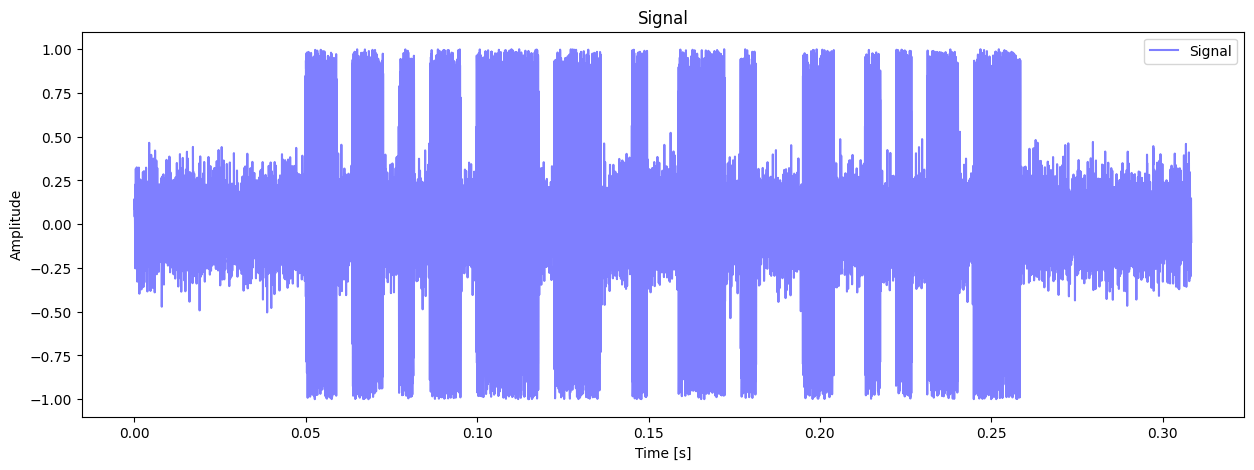

In [73]:
duration = len(signal_wav) / sample_rate
time = np.linspace(0., duration, len(signal_wav))

plt.figure(figsize=(15, 5))
plt.plot(time, signal_wav, label="Signal", color='blue', alpha=0.5)
plt.title("Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.show()

#### 3. Construct fft and plot the frequency domain

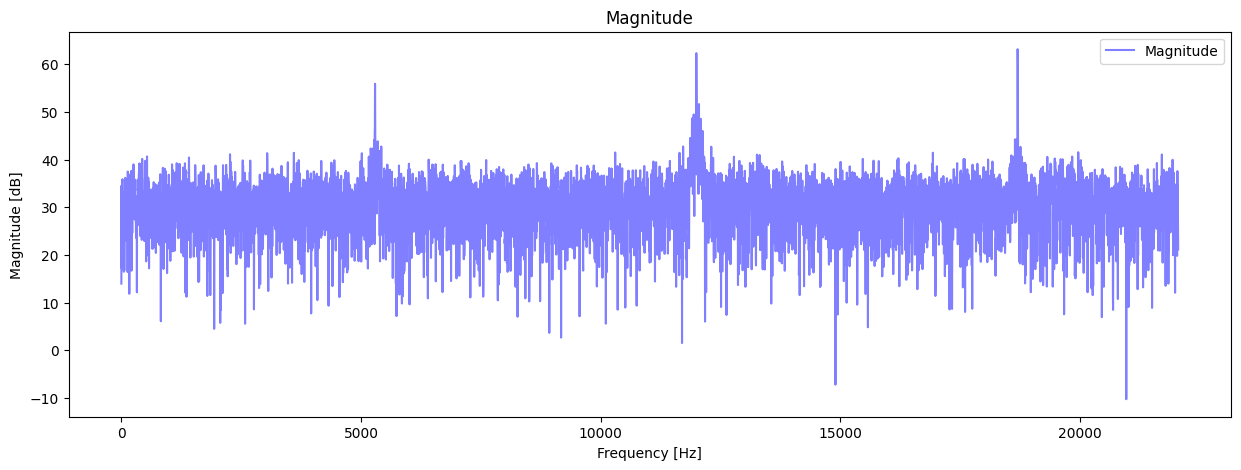

In [74]:
# FFT
fft_signal = np.fft.fft(signal_wav)
# Shift the zero frequency component to the center
fft_signal = np.fft.fftshift(fft_signal)

magnitude = np.abs(fft_signal)
magnitude_dd = 20 * np.log10(magnitude)

### Frequency axis
n = signal_wav.size
timestep = 1/sample_rate
frequencies = np.fft.fftfreq(n, d=timestep)

### Only show the positive frequencies
frequencies = frequencies[:n//2]
magnitude_dd = magnitude_dd[:n//2]

plt.figure(figsize=(15, 5))
plt.plot(frequencies, magnitude_dd, label="Magnitude", color='blue', alpha=0.5)
plt.title("Magnitude")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.legend()

plt.show()

#### 4. Extracting the data out of the signal

In [75]:
msg, norm, energy, bits = demodulate_and_decode(signal_wav)

### Constructing envelope generated from previous method
analytic_signal = signal.hilbert(signal_wav)
envelope = np.abs(analytic_signal)


print(f"Message: {msg}")
print(f"transcribed bits: {bits}")

Message: morten
transcribed bits: [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


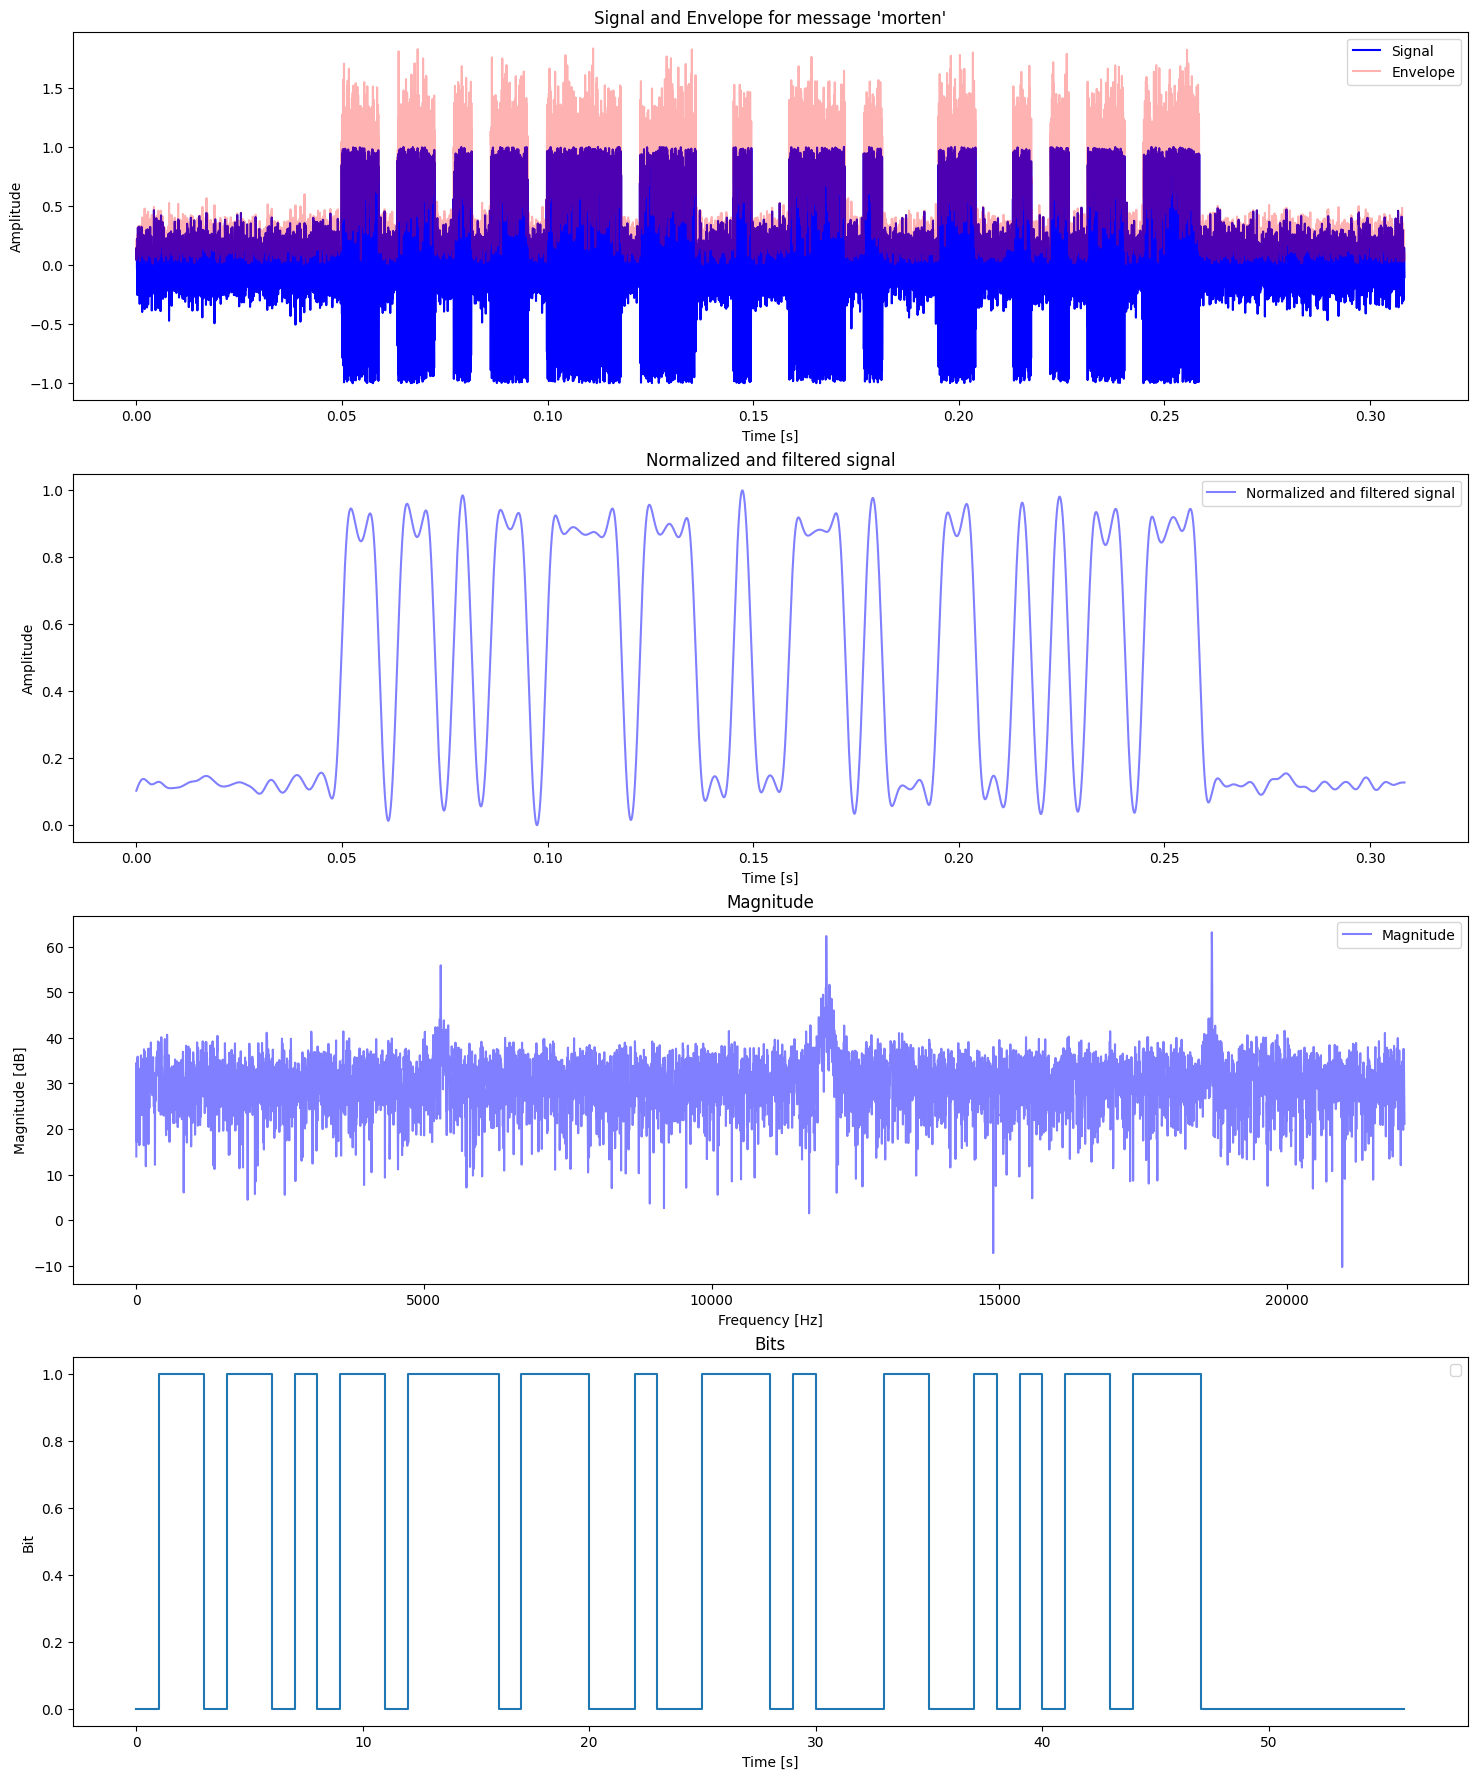

In [76]:
plt.figure(figsize=(18, 22))
plt.subplot(4, 1, 1)
plt.plot(time, signal_wav, label="Signal", color='blue', alpha=1.0)
plt.plot(time, envelope, label="Envelope", color='red', alpha=0.3)
plt.title(f"Signal and Envelope for message '{msg}'")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time, norm, label="Normalized and filtered signal", color='blue', alpha=0.5)
plt.title("Normalized and filtered signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(frequencies, magnitude_dd, label="Magnitude", color='blue', alpha=0.5)
plt.title("Magnitude")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.legend()

plt.subplot(4, 1, 4)
plt.step(range(len(bits)), bits, where="post")
plt.title("Bits")
plt.xlabel("Time [s]")
plt.ylabel("Bit")
plt.legend()

plt.show()
